# Employee Exit Surveys

## Dataset Explanation
In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). Some slight modifications to these datasets were made to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

## Project Goals
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Data Dictionary

### dete_survey.csv:

- `ID`: An id used to identify the participant of the survey
- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE


### tafe_survey.csv:
- `Record ID`: An id used to identify the participant of the survey
- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall`. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

In [60]:
import pandas as pd
import numpy as np
plt.style.use('seaborn')

dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

print(dete_survey.info())
print(dete_survey.head(5))

print(tafe_survey.info())
print(tafe_survey.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [2]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [3]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

## Data observations

- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

To clean up the data, we updated the original pd.read_csv() for dete_survey to read `Not Stated` values as `NaN`. We will also drop columns columns we don't need in both `dete_survey` and `tafe_survey`.

In [4]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [5]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

In [6]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

## Column standardizing

Below we will be renaming the columns to make joining the two survey dataframes together. First, in `dete_survey_updated` we will replace any whitespace at the end of words with `_` characters, rename `separationtype` to `separation_type` to match the other columns, and make everything lowercase.

Then we will create a dictionary to map the formatted column names in `dete_survey_updated` to the unformatted ones in `tafe_survey` where applicable. With that we will rename the columns in `tafe_survey_updated`.

In [13]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace('separationtype','separation_type').str.replace(' ', '_').str.lower()
dete_survey_updated

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,False,True,False,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,True,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [14]:
tafe_dict = {'Record ID':'id','CESSATION YEAR': 'cease_date',
             'Reason for ceasing employment':'separation_type',
             'Gender. What is your Gender?':'gender','CurrentAge. Current Age':'age',
             'Employment Type. Employment Type':'employment_status','Classification. Classification':'position',
             'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service', 
             'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}
tafe_survey_updated.rename(columns=tafe_dict,inplace=True)
tafe_survey_updated

,id,Institute,WorkArea,cease_date,separation_type,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


In [15]:
print(tafe_survey_updated.head(5))
print(dete_survey_updated.head(5))

             id                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date   separation_type  \
0  Non-Delivery (corporate)      2010.0  Contract Expired   
1  Non-Delivery (corporate)      2010.0        Retirement   
2       Delivery (teaching)      2010.0        Retirement   
3  Non-Delivery (corporate)      2010.0       Resignation   
4       Delivery (teaching)      2010.0       Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4   

### separation_type review
If we check the unique values for the column `separation_type` we can see that there are different separation types. For the moment, we'll focus on the separation type containing the string `'Resignation'`.

we noted that the dete_survey_updated dataframe contains multiple separation types with the string `Resignation`:
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

we will need to make sure not to miss those variations when isolating for `Resignation`.

In [16]:
dete_survey_updated['separation_type'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64

In [17]:
dete_survey_updated['separation_type'].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [18]:
tafe_survey_updated['separation_type'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separation_type, dtype: int64

In [19]:
tafe_survey_updated['separation_type'].unique()

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

In [20]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separation_type'] == 'Resignation']
dete_resignations = dete_survey_updated[(dete_survey_updated['separation_type'] == 'Resignation-Other reasons') |
                                      (dete_survey_updated['separation_type'] == 'Resignation-Other employer' )|
                                      (dete_survey_updated['separation_type'] == 'Resignation-Move overseas/interstate')]

In [21]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separation_type                                      340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

## Data Validation
### cease_date and dete_start_date
For the next step, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense.

Here is what was noted:
- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

If there are many years higher than the current date or lower than 1940, we would want to stop with the analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them with minimal impact to the analysis.

In [22]:
# Cleaning the cease_date column in dete_resignations:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2006      1
2010         1
07/2012      1
Name: cease_date, dtype: int64

In [23]:
# We see a mix of yyyy and mm/yyyy in the cease_date column
# creating a pattern to extract the year and convert the value into float
pattern = r"([1-2][0-9]{3})"
dete_res_copy = dete_resignations.copy()
dete_res_copy['cease_date'] = dete_res_copy['cease_date'].str.extract(pattern).astype(float)

In [24]:
dete_res_copy['cease_date'].head()

3     2012.0
5     2012.0
8     2012.0
9     2012.0
11    2012.0
Name: cease_date, dtype: float64

In [25]:
dete_res_copy['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [26]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

<AxesSubplot:>

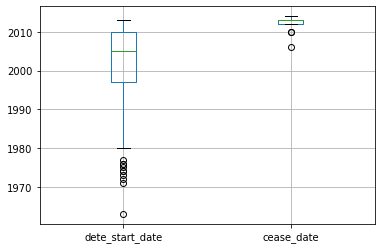

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

dete_res_copy.boxplot(column=['dete_start_date','cease_date'])

<AxesSubplot:>

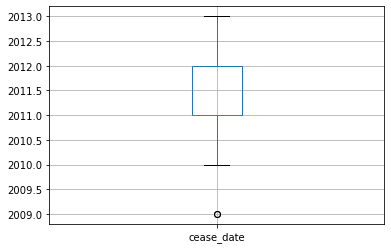

In [28]:
tafe_resignations.boxplot(column=['cease_date'])

After cleaning the values of those columns, we can conclude that every value for `cease_date` in both dataframes is significant and makes sense for our analysis. The outliers in `dete_start_date` are minimal compared to the main distribution.

The start date in the dete dataframe is important, as we will be using along with the cease_date to make a column of values for how long the empoyee worked for the institute. The Tafe dataframe already has this data, so we will just name the new column to match the Tafe one.

In [29]:
## creating a institute_service column

dete_res_copy['institute_service'] = dete_res_copy['cease_date'] - dete_res_copy['dete_start_date']
## checking for NaN values

dete_res_copy['institute_service'].value_counts(dropna=False)

NaN     38
5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
12.0     6
22.0     6
17.0     6
10.0     6
14.0     6
16.0     5
18.0     5
24.0     4
23.0     4
11.0     4
39.0     3
32.0     3
19.0     3
21.0     3
36.0     2
30.0     2
25.0     2
28.0     2
26.0     2
29.0     1
42.0     1
38.0     1
27.0     1
41.0     1
35.0     1
49.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64

We do have quite a few NaN values in both service columns, so to make our analysis accurate we will be dropping those null values.

In [30]:
## dropping NaN values
dete_res_copy.drop(dete_res_copy[dete_res_copy['institute_service'].isnull()].index, inplace=True)
tafe_resignations.drop(tafe_resignations[tafe_resignations['institute_service'].isnull()].index, inplace=True)

C:\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
##checking to make sure NaN values were dropped:
dete_res_copy['institute_service'].value_counts(dropna=False)

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

In [32]:
tafe_resignations['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

## Dissatisfaction.
Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

**tafe_survey_updated:**
- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`

**dete_survey_updated:**
- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

In [33]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

-                                         247
Contributing Factors. Dissatisfaction      43
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      235
Job Dissatisfaction     55
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [34]:
# We note that a mark of '-' indicates no dissastifaction in both columns:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].unique())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].unique())

['-' 'Contributing Factors. Dissatisfaction ']
['-' 'Job Dissatisfaction']


In [35]:
tafe_diss_factors = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']

# Apply a function to transform all values in these columns into boolean format of True/False
tafe_resignations[tafe_diss_factors] = tafe_resignations[tafe_diss_factors].applymap(lambda x: False if x == '-' else True)
tafe_resignations.head()

C:\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,id,Institute,WorkArea,cease_date,separation_type,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4


In [36]:
# Checking to see if values were updated properly
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

False    247
True      43
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    235
True      55
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [37]:
# Create new column to mark "True" if person is dissastisfied due to any of 2 resons
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_diss_factors].any(axis=1, skipna=False)
tafe_resignations.head()

<ipython-input-37-8c9427631eb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tafe_resignations['dissatisfied'] = tafe_resignations[tafe_diss_factors].any(axis=1, skipna=False)


,id,Institute,WorkArea,cease_date,separation_type,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4,False


In [38]:
tafe_resignations['dissatisfied'].value_counts()

False    213
True      77
Name: dissatisfied, dtype: int64

In [39]:
# Doing the same for dete_resignations:
dete_diss_factors = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment',
'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions',
'work_life_balance', 'workload']
dete_res_copy[dete_diss_factors].describe(include='all')

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
count,273,273,273,273,273,273,273,273,273
unique,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False
freq,235,245,267,245,260,256,254,210,249


In [40]:
dete_res_copy['dissatisfied'] = dete_res_copy[dete_diss_factors].any(axis=1, skipna=False)
dete_res_copy['dissatisfied'].value_counts()

True     137
False    136
Name: dissatisfied, dtype: int64

In [41]:
# Create a copy to avoid "SettingWithCopy" Warning
dete_resignations_up = dete_res_copy.copy()
tafe_resignations_up = tafe_resignations.copy()

## Joining dataframes together

In [42]:
# Create new columns in both datasets to distinct between them after merging.
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [43]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.shape

(563, 53)

In [44]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                2
aboriginal                                               7
nesb                                                     8
disability                                               8
business_unit                                           28
classification                                         146
region                                                 234
role_start_date                                        263
relocation                                             273
study/travel                                           273
ill_health                                             273
workload                                               273
work_life_balance                                      273
none_of_the_above                                      273
maternity/family                                       273
traumatic_incident                                     2

In [45]:
# Drop all the columns with less than 500 non-null values
combined_updated = combined.dropna(thresh=500, axis=1).copy()

combined_updated.head()

,id,separation_type,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


In [46]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
14.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


Since we used different classification in these datasets, our values in the `institute_service` column are inconsistent. Let's classify them in the following categories:

- **New:** Less than 3 years at a company
- **Experienced:** 3-6 years at a company
- **Established:** 7-10 years at a company
- **Veteran:** 11 or more years at a company

In [47]:
# Use regex to extract a value from each and convert it to float type
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(r'(\d+)')
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)


In [48]:
# Check
combined_updated['institute_service'].value_counts(dropna=False)

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [49]:
def stage(val):
    '''Classify service years into 4 groups'''
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val >= 3 and val <= 6:
        return 'Experienced'
    elif val >= 7 and val <= 10:
        return 'Established'
    elif val > 11:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(stage)
combined_updated.head()

,id,separation_type,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,Experienced
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,Experienced


In [50]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    349
True     214
Name: dissatisfied, dtype: int64

In [51]:
combined_updated['service_cat'].value_counts(dropna=False)


New            193
Experienced    172
Veteran        106
Established     62
NaN             30
Name: service_cat, dtype: int64

## Data analysis

In [52]:
diss_table = combined_updated.pivot_table(values='dissatisfied', index='service_cat') # Since True = 1, mean function gives %

<AxesSubplot:title={'center':'Dissatisfaction by Working Experience'}>

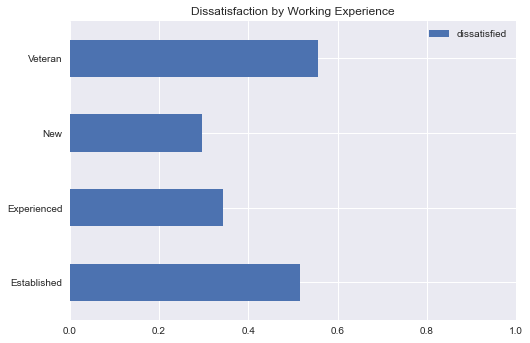

In [61]:
diss_table.plot(kind='barh', xlim=(0,1), title='Dissatisfaction by Working Experience', xlabel = '')

In [57]:
combined_updated['gender'].value_counts(dropna=False)

Female    397
Male      161
NaN         5
Name: gender, dtype: int64

In [62]:
# Fill missing values in "gender" column with the most popular one
combined_updated['gender'].fillna('Female', inplace=True)

In [63]:
# Add 1 more dimension to the previous pivot table
diss_table_gender = combined_updated.pivot_table(values='dissatisfied', columns='gender', index='service_cat')
diss_table_gender

gender,Female,Male
service_cat,,
Established,0.545455,0.444444
Experienced,0.369748,0.283019
New,0.262411,0.384615
Veteran,0.544304,0.592593


<AxesSubplot:title={'center':'Dissatisfaction by working experience and gender'}>

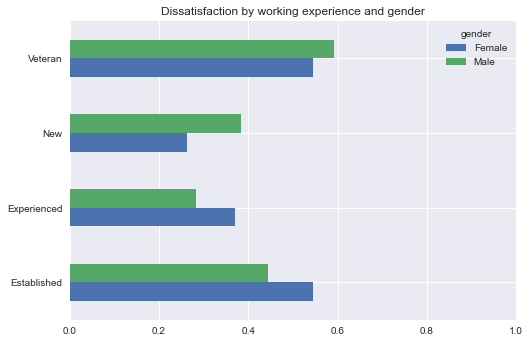

In [64]:
diss_table_gender.plot(kind='barh', xlim=(0,1), title='Dissatisfaction by working experience and gender', xlabel = '')


In [65]:
combined_updated['age'].value_counts(dropna=False)

51-55            69
41  45           45
41-45            44
46  50           39
36-40            36
46-50            34
21  25           33
36  40           32
31  35           32
26  30           32
26-30            31
56 or older      29
31-35            29
21-25            26
56-60            22
61 or older      18
20 or younger    10
NaN               2
Name: age, dtype: int64

In [66]:
# Clean "age" column
combined_updated['age'] = combined_updated['age'].astype(str)
combined_updated['age'] = combined_updated['age'].str.extract(r'(\d+)')
combined_updated['age'] = combined_updated['age'].astype(float)

In [67]:
combined_updated['age'].value_counts(dropna=False)

41.0    89
46.0    73
51.0    69
36.0    68
26.0    63
31.0    61
21.0    59
56.0    51
61.0    18
20.0    10
NaN      2
Name: age, dtype: int64

In [68]:
# Fill missing values with rounded mean
combined_updated['age'].fillna(round(combined_updated['age'].mean()), inplace=True)

In [69]:
def age_group(val):
    '''Classify age into 4 groups'''
    if val <= 25:
        return '25 or younger'
    elif val >25 and val <= 40:
        return '26 to 40'
    elif val > 40 and val <= 55:
        return '41 to 55'
    elif val >=56:
        return '56 and older'
    
combined_updated['age_cat'] = combined_updated['age'].apply(age_group)
combined_updated.head()

,id,separation_type,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat,age_cat
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36.0,7.0,False,DETE,Established,26 to 40
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41.0,18.0,True,DETE,Veteran,41 to 55
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31.0,3.0,False,DETE,Experienced,26 to 40
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46.0,15.0,True,DETE,Veteran,41 to 55
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31.0,3.0,False,DETE,Experienced,26 to 40
